In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [77]:
df = pd.read_csv(r'C:\Users\njhar\Downloads\retail_sales_dataset.csv')

In [78]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [80]:
# checking duplicated values
df.duplicated().sum()

0

In [81]:
# checking not available values or null values
df.isna().any()

Transaction ID      False
Date                False
Customer ID         False
Gender              False
Age                 False
Product Category    False
Quantity            False
Price per Unit      False
Total Amount        False
dtype: bool

In [82]:
# descriptive statistics
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [83]:
df.shape

(1000, 9)

In [84]:
df['Date'] = df['Date'].astype(str)

In [85]:
df['Day'] = df['Date'].str.split('-').str[2]

In [86]:
df['Year'] = df['Date'].str.split('-').str[0]

In [87]:
df['Date'] = pd.to_datetime(df['Date'])

In [88]:
# seperating the month and date and year for the time series analysis
df['Month']  = df['Date'].dt.month_name()

In [89]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Day,Year,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,24,2023,November
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,27,2023,February
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,13,2023,January
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,21,2023,May
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,06,2023,May


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Day               1000 non-null   object        
 10  Year              1000 non-null   object        
 11  Month             1000 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 93.9+ KB


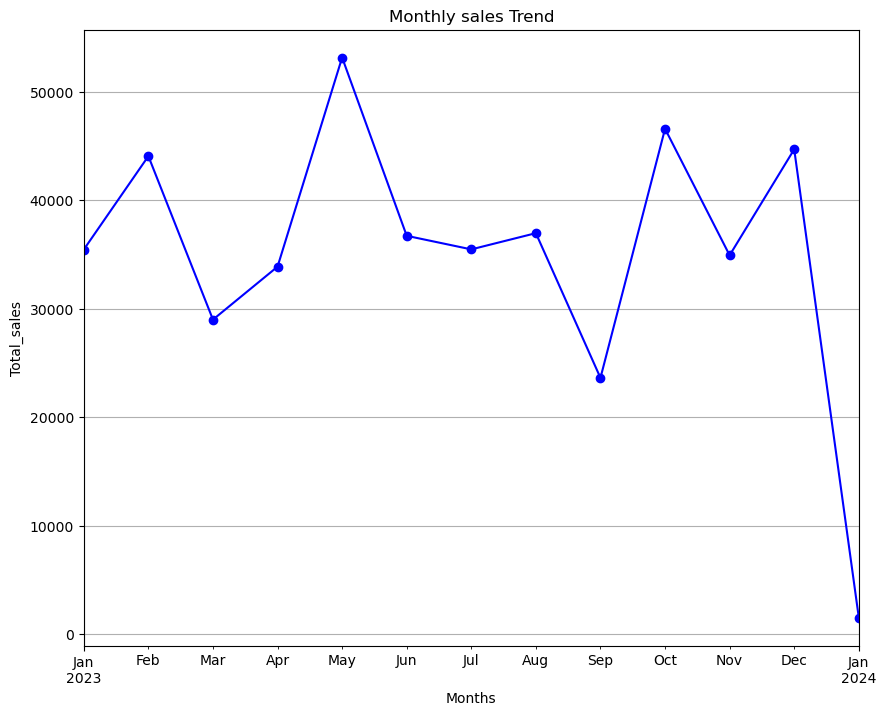

In [91]:
#Time series sales over trend

df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum() #Monthly convertion
plt.figure(figsize=(10,8))
monthly_sales.plot(linestyle = '-', marker = 'o', color = 'b', kind = 'line')
plt.grid(True)
plt.xlabel("Months")
plt.ylabel("Total_sales")
plt.title("Monthly sales Trend")
plt.show()

In [92]:
# date convertion into day names
df['DayName'] = df['Date'].dt.day_name() 

In [93]:
daily_sales = df.groupby(df['DayName'])['Total Amount'].sum()

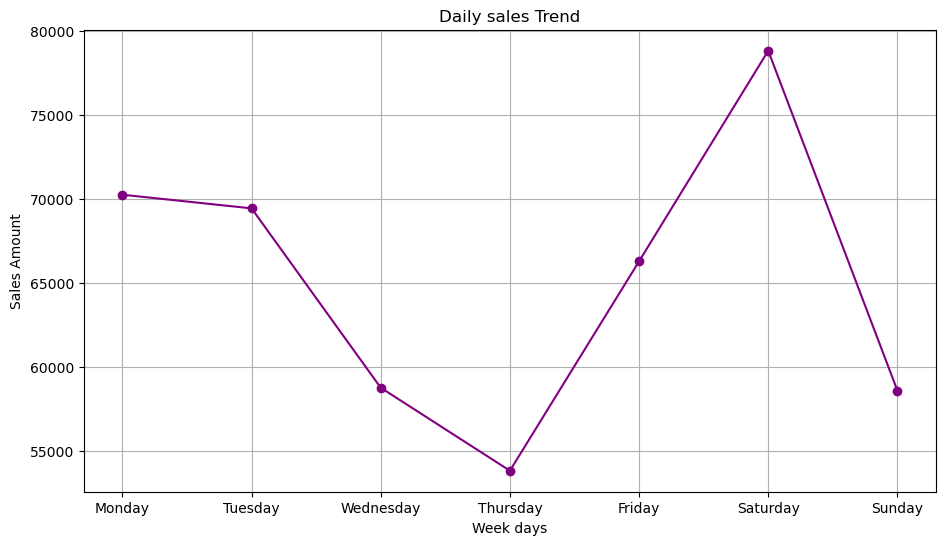

In [94]:
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = daily_sales.reindex(week_days)

# daily sales trend

plt.figure(figsize=(11,6))
daily_sales.plot(kind='line', marker = 'o', linestyle = '-', color = 'purple')
plt.grid(True)
plt.xlabel('Week days')
plt.ylabel('Sales Amount')
plt.title('Daily sales Trend')
plt.show()

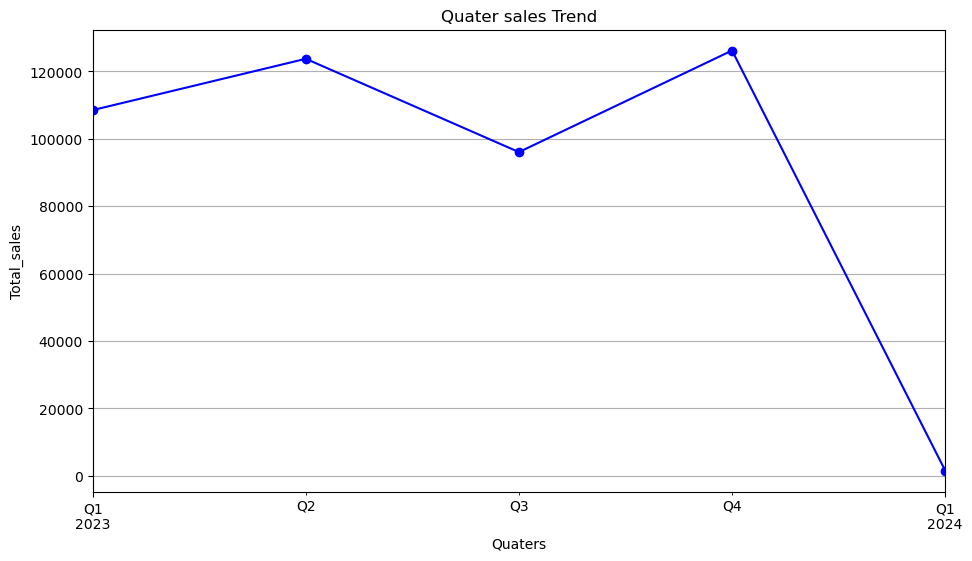

In [95]:
# Quaterly convertion
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.groupby(df['Date'].dt.to_period('Q'))['Total Amount'].sum() 
plt.figure(figsize=(11,6))
monthly_sales.plot(linestyle = '-', marker = 'o', color = 'b', kind = 'line')
plt.grid(True)
plt.xlabel("Quaters")
plt.ylabel("Total_sales")
plt.title("Quater sales Trend")
plt.show()

In [96]:
# Customer and Product Analysis

In [97]:
# Male
male_data =df[df['Gender'] == 'Male']

In [98]:
grp_data = male_data.groupby(['Product Category'])['Quantity'].count()

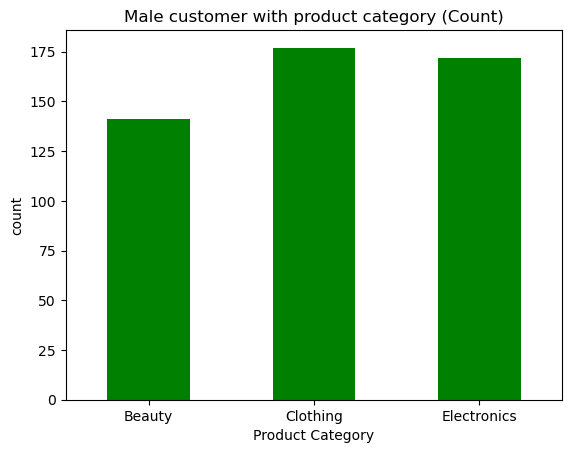

In [99]:
grp_data.plot(kind = 'bar', color = 'g')
plt.ylabel('count')
plt.title('Male customer with product category (Count)')
plt.xticks(rotation=0)
plt.show()

In [100]:
grp_data = male_data.groupby(['Product Category'])['Total Amount'].sum()

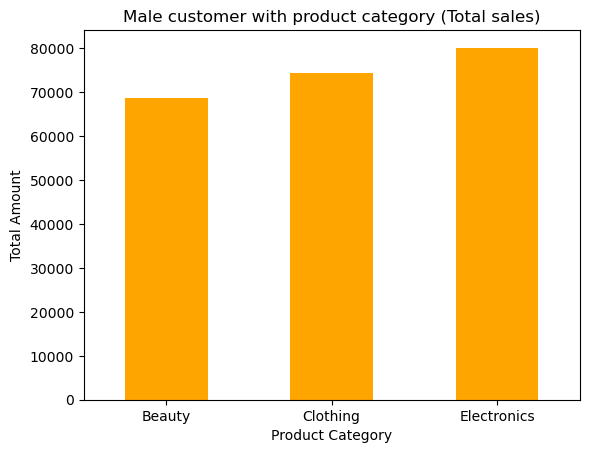

In [101]:
grp_data.plot(kind = 'bar', color = 'orange')
plt.ylabel('Total Amount')
plt.title('Male customer with product category (Total sales)')
plt.xticks(rotation=0)
plt.show()

In [102]:
# Female data
female_data =df[df['Gender'] == 'Female']

In [103]:
grp_data = female_data.groupby(['Product Category'])['Quantity'].count()

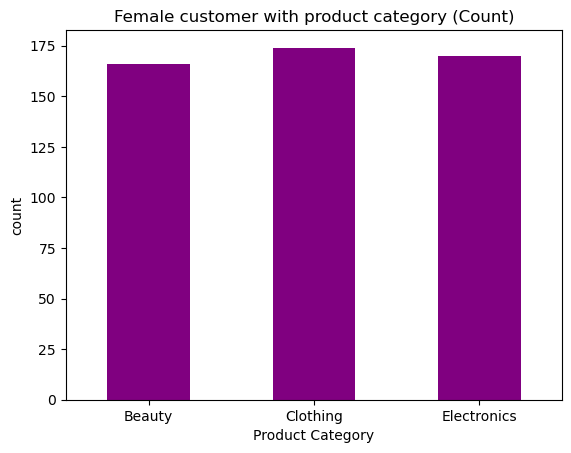

In [104]:
grp_data.plot(kind = 'bar', color = 'purple')
plt.ylabel('count')
plt.title('Female customer with product category (Count)')
plt.xticks(rotation=0)
plt.show()

In [105]:
grp_data = female_data.groupby(['Product Category'])['Total Amount'].sum()

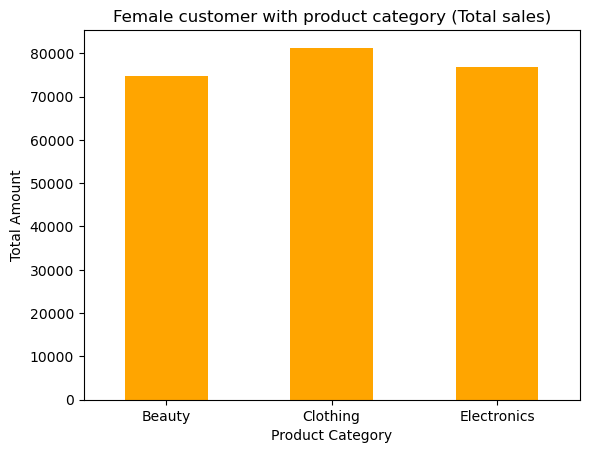

In [106]:
grp_data.plot(kind = 'bar', color = 'orange')
plt.ylabel('Total Amount')
plt.title('Female customer with product category (Total sales)')
plt.xticks(rotation=0)
plt.show()

In [107]:
category_counts = df['Product Category'].value_counts()

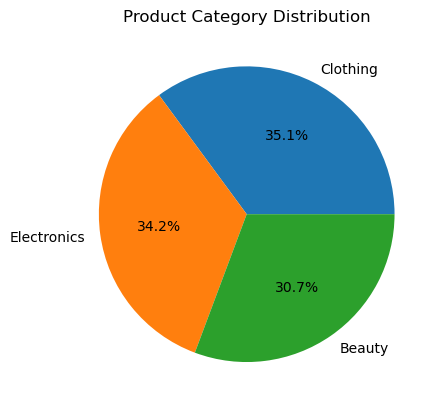

In [108]:
category_counts.plot(kind = 'pie', autopct='%1.1f%%', title='Product Category Distribution')
plt.ylabel(None)
plt.show()

In [109]:
grp_data = df.groupby(['Product Category'])['Price per Unit'].mean()

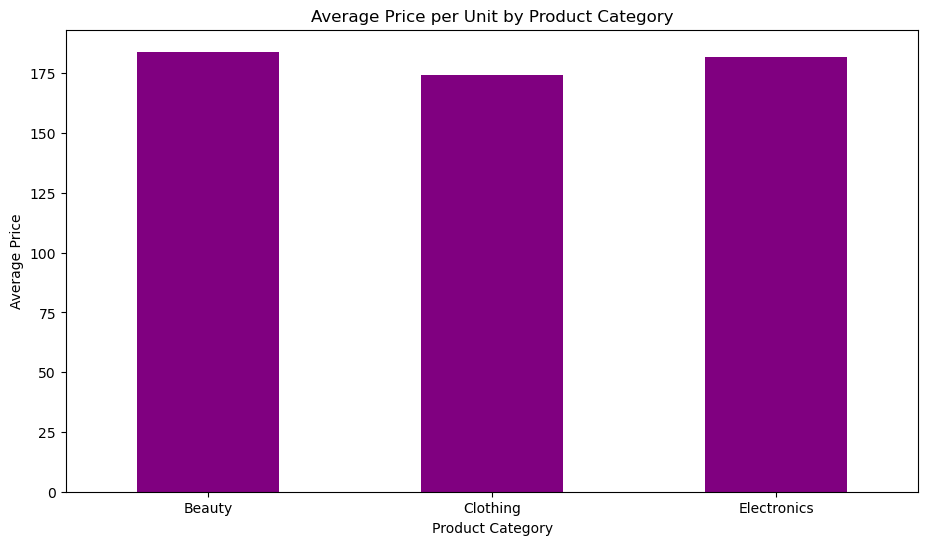

In [110]:
plt.figure(figsize=(11,6))
grp_data.plot(kind = 'bar', color='Purple')
plt.title('Average Price per Unit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

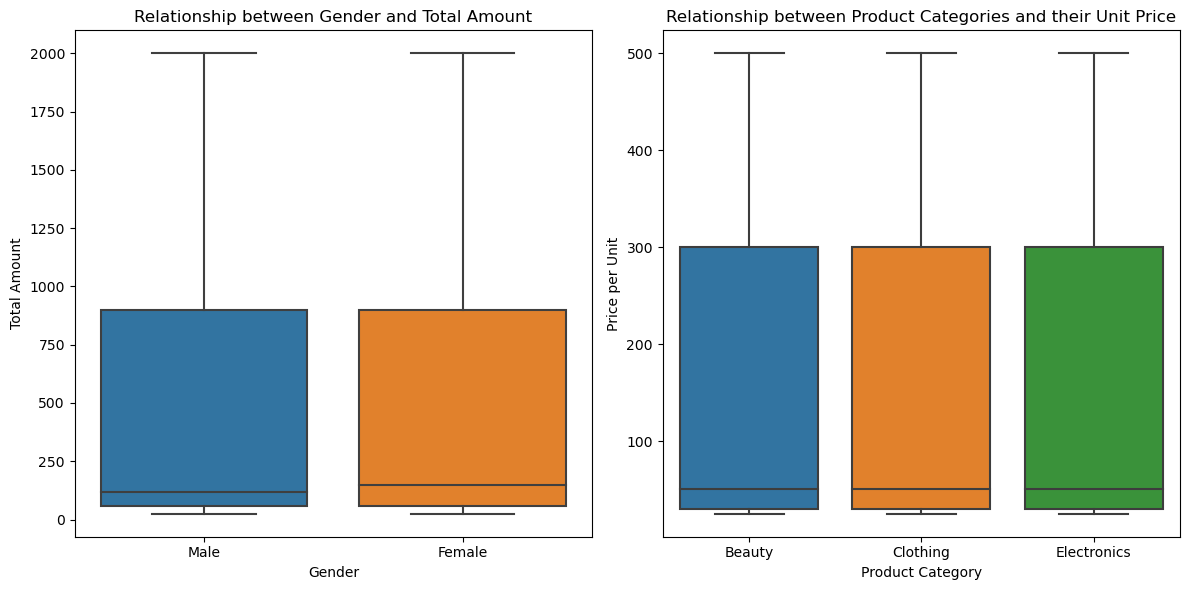

In [111]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 row, 2 columns

sns.boxplot(x='Gender', y='Total Amount', data=df, ax=axes[0])
axes[0].set_title('Relationship between Gender and Total Amount')

sns.boxplot(x='Product Category', y='Price per Unit', data=df, ax=axes[1])
axes[1].set_title('Relationship between Product Categories and their Unit Price')

plt.tight_layout()  # Adjust subplots to give some spacing between plots
plt.show()

In [112]:
# EDA
# Univariate analysis

In [113]:
# Gender counts
df['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

In [114]:
# Age description
df['Age'].describe()

count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: Age, dtype: float64

In [115]:
# counts of product category
df['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [116]:
# Bivariate analysis
#Numerical (vs) numerical

In [117]:
# corr score
#price per unit (vs) total amount
df['Price per Unit'].corr(df['Total Amount'])

0.8519248403554038

<Axes: xlabel='Price per Unit', ylabel='Total Amount'>

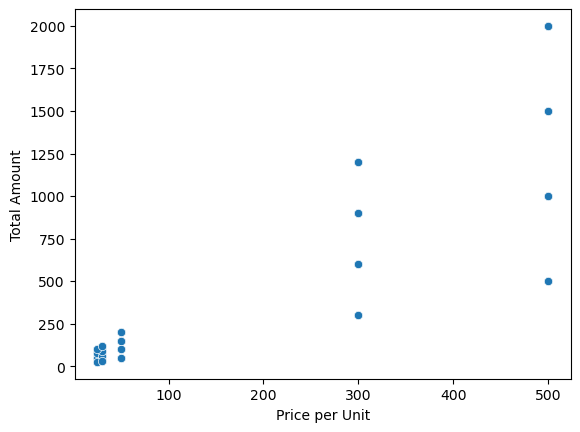

In [118]:
sns.scatterplot(df, x='Price per Unit', y='Total Amount')

In [119]:
# corr score
# quantity (vs) total amount
df['Quantity'].corr(df['Total Amount'])

0.3737070541214054

<Axes: xlabel='Quantity', ylabel='Total Amount'>

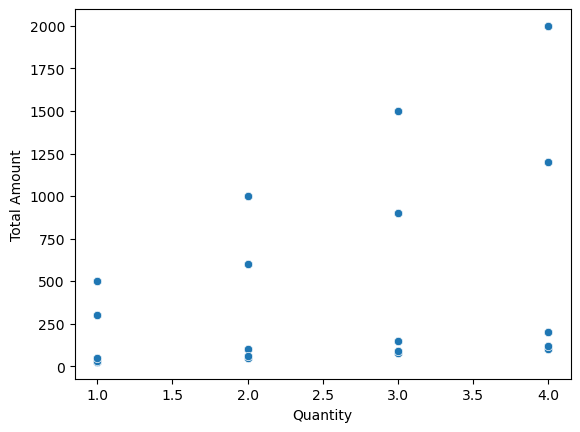

In [120]:
sns.scatterplot(df, x='Quantity', y='Total Amount')

In [121]:
# categorical vs categorical
# gender and product category
pd.crosstab(df['Gender'], df['Product Category'])

Product Category,Beauty,Clothing,Electronics
Gender,,,
Female,166,174,170
Male,141,177,172


In [122]:
# gender and quantity
pd.crosstab(df['Gender'], df['Quantity'])

Quantity,1,2,3,4
Gender,,,,
Female,125,120,127,138
Male,128,123,114,125


In [123]:
# product_category and quantity
pd.crosstab(df['Product Category'], df['Quantity'])

Quantity,1,2,3,4
Product Category,,,,
Beauty,74,75,85,73
Clothing,88,80,86,97
Electronics,91,88,70,93


<Axes: xlabel='Product Category', ylabel='Total Amount'>

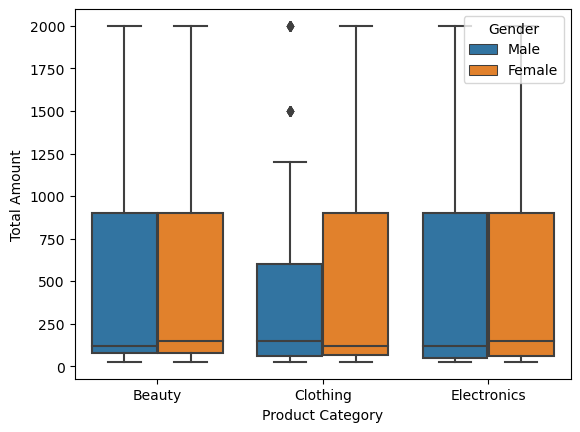

In [124]:
#Multi variate analysis
# product category (vs) total amount (vs) gender
sns.boxplot(df, x='Product Category', y='Total Amount', hue='Gender')

<Axes: xlabel='Price per Unit', ylabel='Total Amount'>

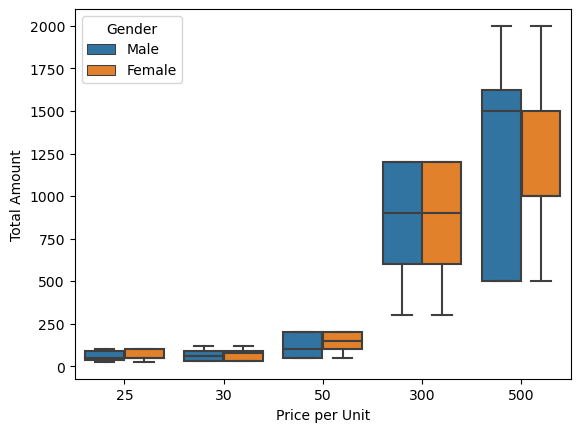

In [125]:
# price per unit (vs) total amount (vs) gender
sns.boxplot(df, x='Price per Unit', y='Total Amount', hue='Gender')